<a href="https://colab.research.google.com/github/c-c-c-c/sdance/blob/master/filter_matplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

フィルターテスト

In [0]:
from pathlib import Path
from google.colab import drive
import datetime as dt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
# マウントする
from google.colab import drive
drive.mount('/content/drive')

HOME_DIR = Path('/content/drive/My Drive/filter_test')

INPUT_CSV_DIR = HOME_DIR / 'input_csv'

df = pd.read_csv( str( INPUT_CSV_DIR/"honmei.csv" ) )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = df.iloc[ :, 2:]

###まず普通に表示

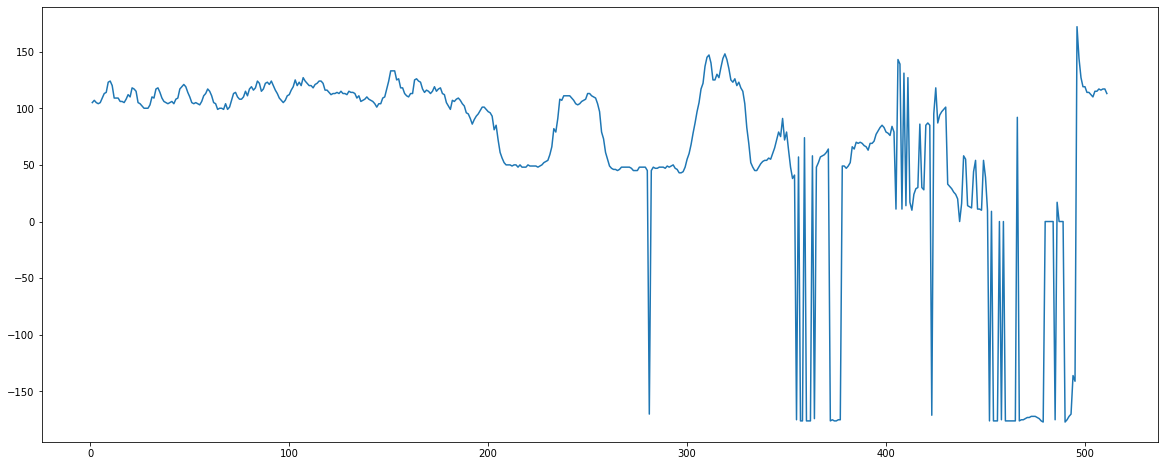

In [5]:
# fig = plt.figure(figsize=(90,20))
from matplotlib import pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(
    df.iloc[ :, 0].tolist(),
    df.iloc[ :, 1].tolist())


plt.show()

#  figsize=(10,10),dpi=200

###ローパスフィルター

In [0]:
#ローパスフィルター
def lpf(a, w):
    v0 = np.array([1, 4, 6, 4, 1])/16.0
    y1 = np.convolve(a, v0, mode='same')

    v1 = np.ones(w)/w
    y2 = np.convolve(y1, v1, mode='same')

    return y2

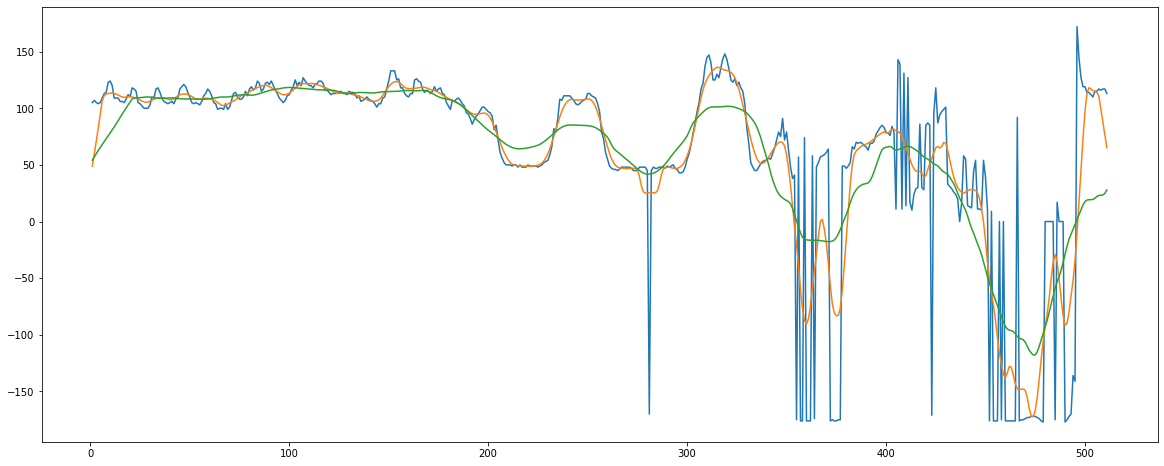

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(
    df.iloc[ :, 0].tolist(),
    df.iloc[ :, 1].tolist())

plt.plot(
    df.iloc[ :, 0].tolist(),
    lpf( df.iloc[ :, 1].tolist(), 10))

plt.plot(
    df.iloc[ :, 0].tolist(),
    lpf( df.iloc[ :, 1].tolist(), 40))

plt.show()


###ハイパスフィルター

In [0]:
def hpf(a):
    v5 = np.array([1, 4, 6, 4, 1])/16.0
    y1 = np.convolve(a, v5, mode='same')

    v05 = np.ones( 5)/5.0
    v07 = np.ones( 7)/7.0
    v11 = np.ones(11)/11.0
    v15 = np.ones(15)/15.0
    v21 = np.ones(21)/21.0
    v31 = np.ones(31)/31.0

    y2 = np.convolve(y1, v05, mode='same')
    y3 = np.convolve(y1, v15, mode='same')

    y4 = y2 - y3

    return y4

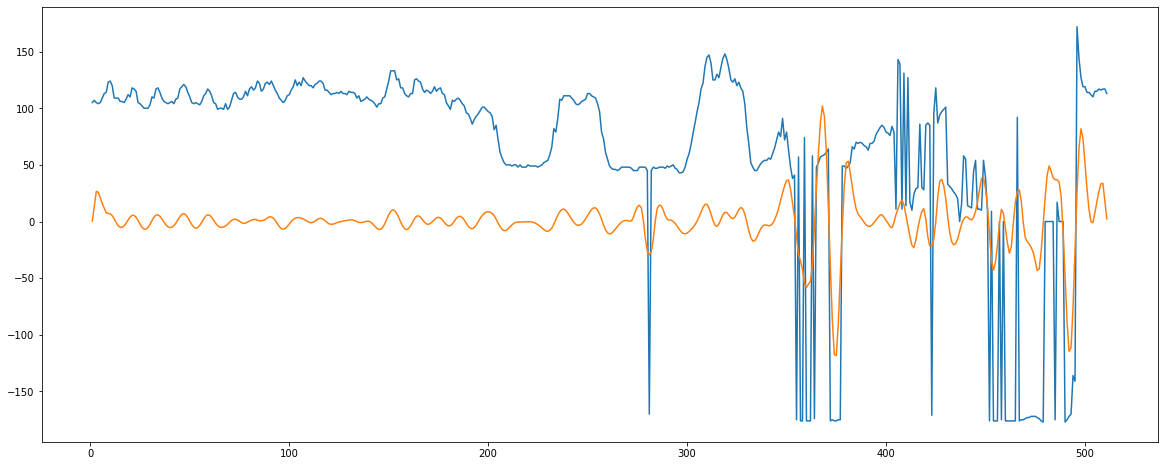

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(
    df.iloc[ :, 0].tolist(),
    df.iloc[ :, 1].tolist())

plt.plot(
    df.iloc[ :, 0].tolist(),
    hpf( df.iloc[ :, 1].tolist()))

plt.show()

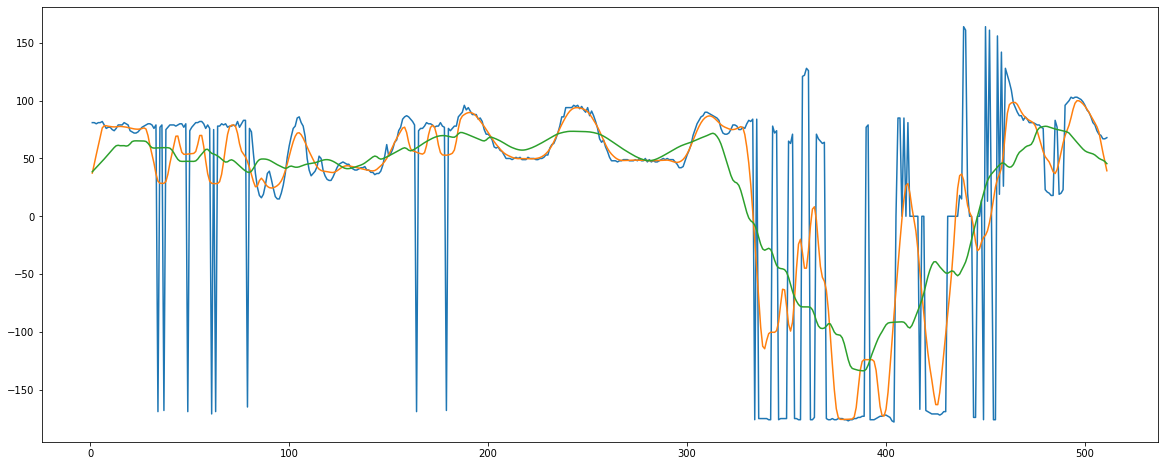

In [0]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(
    df.iloc[ :, 0].tolist(),
    df.iloc[ :, 2].tolist())

plt.plot(
    df.iloc[ :, 0].tolist(),
    lpf( df.iloc[ :, 2].tolist(), 10))

plt.plot(
    df.iloc[ :, 0].tolist(),
    lpf( df.iloc[ :, 2].tolist(), 40))

plt.show()


### Hampelフィルタ

In [0]:
'''
* Input
    * x       input data # listを渡す
    * k       half window size (full 2*k+1)          
    * thr     threshold (defaut 3), optional

* Output
    * output_x    filtered data
    * output_Idx indices of outliers
'''
def Hampel(x, k, thr=3):

    x = np.array(x)

    arraySize = len(x)
    idx = np.arange(arraySize)
    output_x = x.copy()
    output_Idx = np.zeros_like(x)

    for i in range(arraySize):
        # print(i)
        mask1 = np.where( idx >= (idx[i] - k) ,True, False)
        mask2 = np.where( idx <= (idx[i] + k) ,True, False)
        kernel = np.logical_and(mask1, mask2)
        # kernel = kernel.astype(np.int).tolist()
        # print(kernel)
        # print(kernel.astype(np.int))
        median = np.median(x[kernel])
        std = 1.4826 * np.median(np.abs(x[kernel] - median))
        '''
        print("mask1 =", mask1)
        print("mask2 =", mask2)
        print("kernel =", kernel)
        print("x[kernel] =", x[kernel])
        print("median =", median)
        print("std =", std)
        print("")
        '''
        if np.abs(x[i] - median) > thr * std:
            output_Idx[i] = 1
            output_x[i] = median

    # return output_x, output_Idx.astype(bool)
    return output_x

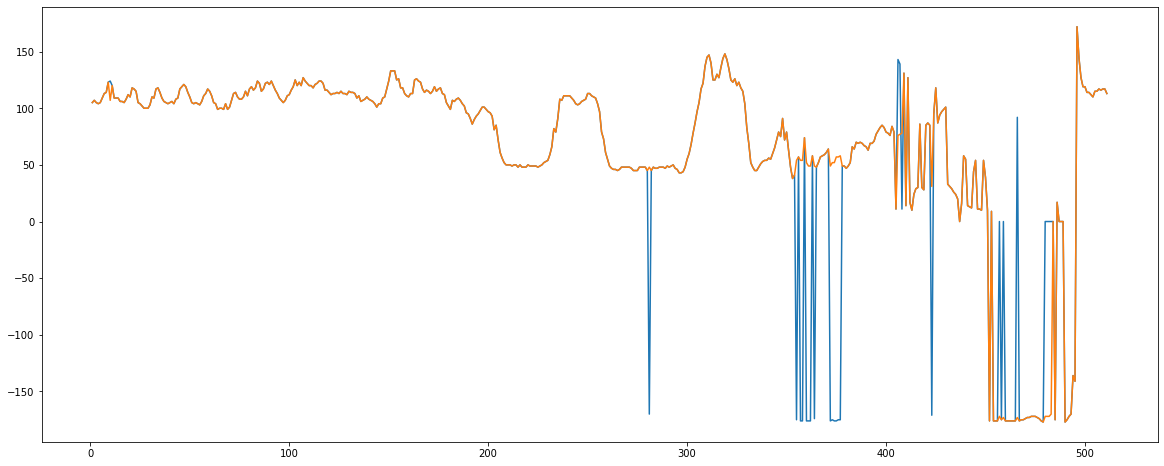

In [11]:

from matplotlib import pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(
    df.iloc[ :, 0].tolist(),
    df.iloc[ :, 1].tolist())

plt.plot(
    df.iloc[ :, 0].tolist(),
    Hampel(df.iloc[ :, 1].tolist(), 20, thr=3))

plt.show()






